In [29]:

import pickle
import os, sys
import pandas as pd
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p', filename='gn-wesad_checking.log')
logging.getLogger().addHandler(logging.StreamHandler(sys.stdout))

gnwesad = '/mnt/d/Users/alkurdi/data/GN-WESAD'
wesad = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/WESAD'

subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
snrs = [0.15]#[0.4,0.1,0.01,0.15,0.05,0.3,0.2,0.0001,0.001,0.5,0.6]  
n_i = [5,0,1,2,3,4,5,6,7,8,9] 
num_cases = len(n_i)*len(snrs)* len(subject_ids)
#point1 = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/E2Epreprocessed_n_5_snr_0.1/WESAD'
#point01 = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/E2Epreprocessed_n_5_snr_0.01/WESAD'

In [2]:
y_wesad={}
for participant in subject_ids:
    y_wesad[participant] = pd.read_pickle(wesad + f'/S{participant}/S{participant}.pkl')

In [30]:
str(round((10*60+7.9)/len(subject_ids))) +" s needed to load each participant's WESAD data"

"41 s needed to load each participant's WESAD data"

In [31]:
logging.info(f'number of cases need to run: {num_cases}')#

number of cases need to run: 165
number of cases need to run: 165


In [32]:
logging.info(f'time wasted reading wesad in the loop is {round(num_cases*(10+7.9/60)/len(subject_ids)/60)} hours of my life gone and never coming back')

time wasted reading wesad in the loop is 2 hours of my life gone and never coming back
time wasted reading wesad in the loop is 2 hours of my life gone and never coming back


In [34]:
what = 'signal'
problems = []
for n in n_i:
    for snr in snrs:
        for participant in subject_ids:
            with open(gnwesad + f'/n_{n}/snr_{snr}/S{participant}/organized_S{participant}.pkl', 'rb') as f:
                yfixed = pickle.load(f)
            logging.info('-'*20)
            device = 'chest'
            logging.info(f'{device}')
            logging.info(f'n = {n}, snr = {snr}, participant = {participant}')
            logging.info(f'signal \t sig len \t wesad len\t\t identica?')
            for sensor in ['ACC', 'ECG', 'Resp']:
                #if yfixed[what][device][sensor].shape != y_wesad[what][device][sensor].shape:
                state = 'yay' if (yfixed[what][device][sensor].shape == y_wesad[participant][what][device][sensor].shape) else 'nay'
                logging.info(f'{sensor} \t{yfixed[what][device][sensor].shape}\t{y_wesad[participant][what][device][sensor].shape}\t\t {state}')
                if yfixed[what][device][sensor].shape != y_wesad[participant][what][device][sensor].shape:
                    problems.append(f'n = {n}, snr = {snr}, participant = {participant}, sensor = {sensor}')
            logging.info('----')
            device = 'wrist'
            logging.info(f'{device}')
            for sensor in ['ACC', 'BVP', 'EDA', 'TEMP']:
                state = 'yay' if (yfixed[what][device][sensor].shape == y_wesad[participant][what][device][sensor].shape) else 'nay'
                #logging.info(f'{sensor} \t{yfixed[what][device][sensor].shape}\t{y_wesad[participant][what][device][sensor].shape}\t\t {state}')
                if yfixed[what][device][sensor].shape != y_wesad[participant][what][device][sensor].shape:
                    problems.append(f'n = {n}, snr = {snr}, participant = {participant}, sensor = {sensor}')
            #logging.info('-'*20)


--------------------
--------------------
chest
chest
n = 5, snr = 0.15, participant = 2
n = 5, snr = 0.15, participant = 2
signal 	 sig len 	 wesad len		 identica?
signal 	 sig len 	 wesad len		 identica?
ACC 	(4255300, 3)	(4255300, 3)		 yay
ACC 	(4255300, 3)	(4255300, 3)		 yay
ECG 	(4255300, 1)	(4255300, 1)		 yay
ECG 	(4255300, 1)	(4255300, 1)		 yay
Resp 	(4255300, 1)	(4255300, 1)		 yay
Resp 	(4255300, 1)	(4255300, 1)		 yay
----
----
wrist
wrist
ACC 	(194528, 3)	(194528, 3)		 yay
ACC 	(194528, 3)	(194528, 3)		 yay
BVP 	(389056, 1)	(389056, 1)		 yay
BVP 	(389056, 1)	(389056, 1)		 yay
EDA 	(24316, 1)	(24316, 1)		 yay
EDA 	(24316, 1)	(24316, 1)		 yay
TEMP 	(24316, 1)	(24316, 1)		 yay
TEMP 	(24316, 1)	(24316, 1)		 yay
--------------------
--------------------
chest
chest
n = 5, snr = 0.15, participant = 3
n = 5, snr = 0.15, participant = 3
signal 	 sig len 	 wesad len		 identica?
signal 	 sig len 	 wesad len		 identica?
ACC 	(4545100, 3)	(4545100, 3)		 yay
ACC 	(4545100, 3)	(4545100, 3)	

SyntaxError: 'break' outside loop (524906991.py, line 30)

In [65]:
if len(problems) > 0:
    logging.info(f'problem cases are: {problems}') 
else:
    logging.info('wow no problems')

wow no problems
wow no problems


In [47]:
with open(gnwesad + f'/n_{n}/snr_{snr}/S{3}/organized_S{3}.pkl', 'rb') as f:
                yfixed = pickle.load(f)

In [61]:
print(list(y_wesad[3]['signal']['chest'].keys())==list(yfixed['signal']['chest'].keys()))
print(list(y_wesad[3]['signal']['wrist'].keys())==list(yfixed['signal']['wrist'].keys()))

True
True


In [63]:
for key in y_wesad[3]['signal']['chest'].keys():
    print(y_wesad[3]['signal']['chest'][key].shape==yfixed['signal']['chest'][key].shape)
for key in y_wesad[3]['signal']['wrist'].keys():
    print(y_wesad[3]['signal']['wrist'][key].shape==yfixed['signal']['wrist'][key].shape)


True
True
True
True
True
True
True
True
True
True


In [ ]:
logging.info("\ngnwesad = '/mnt/d/Users/alkurdi/data/GN-WESAD' \n\
            wesad = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/WESAD' \n\
            subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17] \n\
            snrs = [0.4,0.1,0.01,0.15,0.05,0.3,0.2,0.0001,0.001,0.5,0.6]  \n\
            n_i = [0,1,2,3,4,5,6,7,8,9]  \n")

In [70]:
c_gnwesad = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/GN-WESAD/n_5/snr_0.15/S8/organized_S8.pkl'
d_gnwesad = '/mnt/d/Users/alkurdi/data/GN-WESAD/n_5/snr_0.15/S8/organized_S8.pkl'
# c is bad and d is good

In [71]:
import os
import pickle
with open(c_gnwesad, 'rb') as f:
    c_data = pickle.load(f)
with open(d_gnwesad, 'rb') as f:
    d_data = pickle.load(f)
    

In [81]:
c_data['signal']['chest']['ACC'].shape

(174912, 3)

In [82]:
d_data['signal']['chest']['ACC'].shape

(3826200, 3)

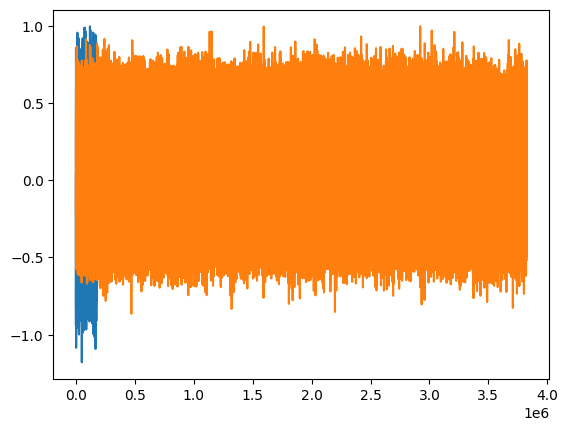

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_data['signal']['chest']['ACC'][:,0]/c_data['signal']['chest']['ACC'][:,0].max())
plt.plot(d_data['signal']['chest']['ACC'][:,0]/d_data['signal']['chest']['ACC'][:,0].max())    
